In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from utils import transform_into_bins

In [75]:
df = pd.read_csv('clean_data/master.csv')

df.head()

numero_departement          nom_commune  code_region   nom_region  codgeo  \
0                   1              Ambléon           82  Rhône-Alpes    1006   
1                   1             Ambronay           82  Rhône-Alpes    1007   
2                   1             Ambutrix           82  Rhône-Alpes    1008   
3                   1    Ambérieu-en-Bugey           82  Rhône-Alpes    1004   
4                   1  Ambérieux-en-Dombes           82  Rhône-Alpes    1005   

    latitude  longitude             libgeo_x  nb_ent  nb_ent_0  ...  \
0  45.750000   5.600000              Ambléon     4.0       4.0  ...   
1  46.000000   5.350000             Ambronay   124.0      87.0  ...   
2  45.933333   5.333333             Ambutrix    48.0      28.0  ...   
3  45.950000   5.350000    Ambérieu-en-Bugey   996.0     577.0  ...   
4  46.000000   4.900000  Ambérieux-en-Dombes    99.0      73.0  ...   

   nombre_de_points_libelle_grand_secteur_agriculture  \
0                                                0.0    
1                                               34.0    
2                                                0.0    
3                                                0.0    
4                                               76.0    

   consommation_libelle_grand_secteur_agriculture  \
0                                        0.000000   
1                                     1882.352808   
2                                        0.000000   
3                                        0.000000   
4                                      540.749000   

   nombre_de_points_libelle_grand_secteur_industrie  \
0                                               0.0   
1                                              47.0   
2                                               0.0   
3                                             335.0   
4                                               0.0   

   consommation_libelle_grand_secteur_industrie  \
0                                      0.000000   
1                                   8284.023918   
2                                      0.000000   
3                                  38951.348807   
4                                      0.000000   

   nombre_de_points_libelle_grand_secteur_secteur inconnu  \
0                                                0.0        
1                                               42.0        
2                                                0.0        
3                                              468.0        
4                                              144.0        

   consommation_libelle_grand_secteur_secteur inconnu  \
0                                           0.000000    
1                                         543.530616    
2                                           0.000000    
3                                        4785.467174    
4                                        2296.911000    

   nombre_de_points_libelle_grand_secteur_tertiaire  \
0                                               0.0   
1                                             306.0   
2                                              92.0   
3                                            3205.0   
4                                              56.0   

   consommation_libelle_grand_secteur_tertiaire  \
0                                      0.000000   
1                                  10574.308665   
2                                   1544.815201   
3                                 360212.285712   
4                                    469.940000   

  nombre_de_points_libelle_grand_secteur_résidentiel  \
0                                              359.0   
1                                            13255.0   
2                                             3240.0   
3                                            99410.0   
4                                             3016.0   

   consommation_libelle_grand_secteur_résidentiel  
0                                     2011.133074  
1     

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31780 entries, 0 to 31779
Data columns (total 74 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   numero_departement                                                                        31780 non-null  int64  
 1   nom_commune                                                                               31780 non-null  object 
 2   code_region                                                                               31780 non-null  int64  
 3   nom_region                                                                                31780 non-null  object 
 4   codgeo                                                                                    31780 non-null  int64  
 5   latitude                                             

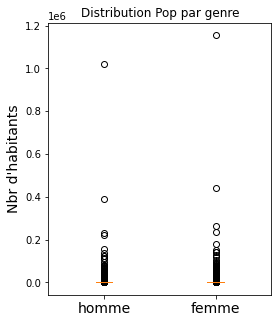

In [131]:
plt.figure(figsize = (4, 5))
plt.boxplot( [df.pop_sexe_homme, df.pop_sexe_femme ])
plt.title('Distribution Pop par genre')
plt.ylabel("Nbr d'habitants", fontsize = 14)
plt.xticks([1,2], ['homme', 'femme'], fontsize = 14);

In [132]:
df['enfant'] = df['pop_age_0-5'] + df['pop_age_5-10'] + df['pop_age_10-15'] + df['pop_age_10-15']
df['jeunes_adultes'] = df['pop_age_15-20'] + df['pop_age_20-25'] + df['pop_age_25-30'] 
df['adultes_actifs'] = df['pop_age_30-35'] + df['pop_age_35-40'] + df['pop_age_40-45'] + df['pop_age_45-50'] + df['pop_age_50-55'] + df['pop_age_55-60']
df['retraités'] = df['pop_age_60-65'] + df['pop_age_65-70'] + df['pop_age_70-75'] + df['pop_age_75-80'] + df['pop_age_80+']

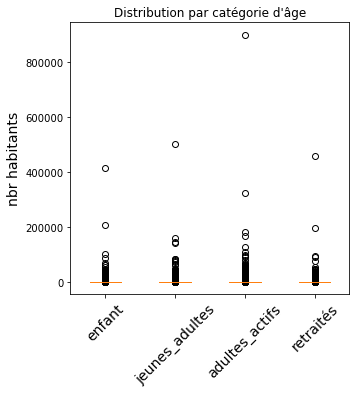

In [133]:
plt.figure(figsize = (5,5))
plt.boxplot([df.enfant, df.jeunes_adultes, df.adultes_actifs, df.retraités])
plt.xticks([1,2,3,4], ['enfant', 'jeunes_adultes', 'adultes_actifs','retraités'], fontsize = 14, rotation = 45)
plt.ylabel('nbr habitants', fontsize = 14)
plt.title("Distribution par catégorie d'âge");


In [ ]:
## Ratio Population / Entrerpises

0.8834487098804279
(4582, 79)
0.9893643801132788
14.15456633744967
(31442, 79)


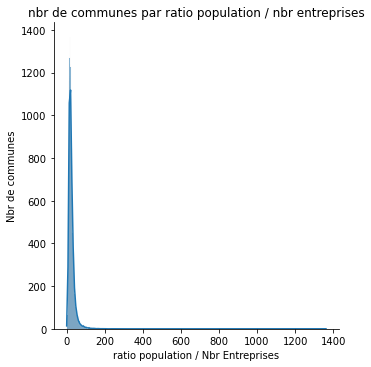

In [134]:
print(df[df['pop_total']<2500].shape[0] / df.shape[0])
print(df[df['pop_total']>2000].shape)
print(df[df['nb_ent'] > 0].shape[0] / df.shape[0])
print(df['pop_total'].mean()/df['nb_ent'].mean())
df['ratio_pop_ent'] = df['pop_total'] / df['nb_ent']
df.head()

df_ratio = df[df['nb_ent']>0]
print(df_ratio.shape)
sns.displot(df_ratio['ratio_pop_ent'], kde = True)
plt.title('nbr de communes par ratio population / nbr entreprises')
plt.xlabel('ratio population / Nbr Entreprises')
plt.ylabel('Nbr de communes');
plt.savefig('ratio_pop_ent.png')

In [73]:
df[df['pop_total']<2500]['nb_ent'].mean()


29.81453910813506

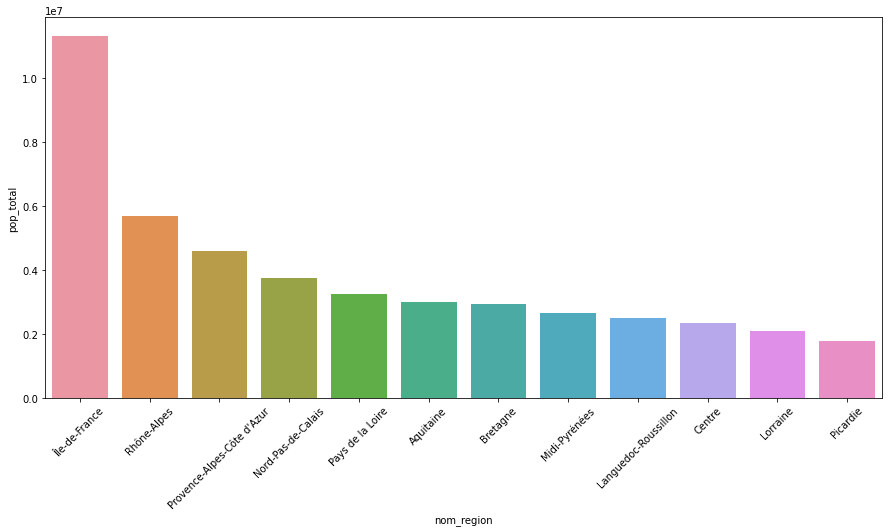

In [80]:
df_pop_region = df.groupby('nom_region').agg({'pop_total' : 'sum'})
df_pop_region = df_pop_region.sort_values('pop_total', ascending = False).head(12)
df_pop_region
plt.figure(figsize = (15,7))
sns.barplot(x = df_pop_region.index, y = 'pop_total', data = df_pop_region)
plt.xticks(rotation = 45);

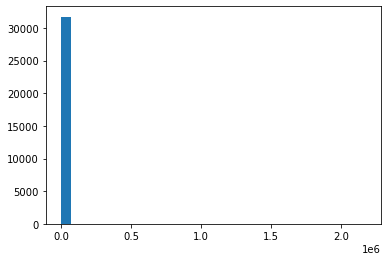

In [10]:
plt.hist(df.pop_total, bins = 30);


In [98]:
## Chiffres clés Population mode cohabitation

print(df['pop_sexe_homme'].sum()/df['pop_total'].sum())
print(df['pop_sexe_femme'].sum()/df['pop_total'].sum())


0.4836660149548124
0.5163339850451876


In [130]:
df_cohab = df[['pop_mode_cohabitation_enfant_dun_couple',
     'pop_mode_cohabitation_enfant_dune_famille_monoparentale',
    'pop_mode_cohabitation_adulte_dun_couple_sans_enfant',
    'pop_mode_cohabitation_adulte_dun_couple_avec_enfant(s)',
     'pop_mode_cohabitation_adulte_dune_famille_monoparentale',
     'pop_mode_cohabitation_personne_vivant_hors_famille_dans_un_menage_de_plusieurs_personnes',
     'pop_mode_cohabitation_personne_vivant_seule']]

df_cohab_tot = pd.DataFrame(df_cohab.apply(np.sum , axis = 0), columns = ['hbts par mode cohabitation'])
df_cohab_tot['% population par mode de cohabitation'] = (df_cohab_tot['hbts par mode cohabitation'] / df['pop_total'].sum())*100

df_cohab_tot  = df_cohab_tot.sort_values('% population par mode de cohabitation',ascending  = False )

df_cohab_tot['mode cohabitation'] = df_cohab_tot.index
df_cohab_tot



hbts par mode cohabitation  \
pop_mode_cohabitation_adulte_dun_couple_sans_en...                  13813850.0   
pop_mode_cohabitation_adulte_dun_couple_avec_en...                  13755610.0   
pop_mode_cohabitation_enfant_dun_couple                             12739470.0   
pop_mode_cohabitation_personne_vivant_seule                          9175631.0   
pop_mode_cohabitation_enfant_dune_famille_monop...                   3717605.0   
pop_mode_cohabitation_adulte_dune_famille_monop...                   2385706.0   
pop_mode_cohabitation_personne_vivant_hors_fami...                   2118101.0   

                                                    % population par mode de cohabitation  \
pop_mode_cohabitation_adulte_dun_couple_sans_en...                              23.938337   
pop_mode_cohabitation_adulte_dun_couple_avec_en...                              23.837411   
pop_mode_cohabitation_enfant_dun_couple                                         22.076519   
pop_mode_cohabitation_personne_vivant_seule                                     15.900661   
pop_mode_cohabitation_enfant_dune_famille_monop...                               6.442323   
pop_mode_cohabitation_adulte_dune_famille_monop...                               4.134244   
pop_mode_cohabitation_personne_vivant_hors_fami...                               3.670506   

                                                                                    mode cohabitation  
pop_mode_cohabitation_adulte_dun_couple_sans_en...  pop_mode_cohabitation_adulte_dun_couple_sans_e...  
pop_mode_cohabitation_adulte_dun_couple_avec_en...  pop_mode_cohabitation_adulte_dun_couple_avec_e...  
pop_mode_cohabitation_enfant_dun_couple                       pop_mode_cohabitation_enfant_dun_couple  
pop_mode_cohabitation_personne_vivant_seule               pop_mode_cohabitation_personne_vivant_seule  
pop_mode_cohabitation_enfant_dune_famille_monop...  pop_mode_cohabitation_enfant_dune_famille_mono...  
pop_mode_cohabitation_adulte_dune_famille_monop...  pop_mode_cohabitation_adulte_dune_famille_mono...  
pop_mode_cohabitation_personne_vivant_hors_fami...  pop_mode_cohabitation_personne_vivant_hors_fam...

In [145]:
df_top10 = df.sort_values('pop_total', ascending = False).head(10)
print(df_top10['pop_total'].sum() / df['pop_total'].sum())
print(df_top10['nb_ent'].sum() / df['nb_ent'].sum())





0.0966492844683513
0.18040617192951902


In [146]:
df_top10['enfant'] = df_top10['pop_age_0-5'] + df_top10['pop_age_5-10'] + df_top10['pop_age_10-15'] + df_top10['pop_age_10-15']
df_top10['jeunes_adultes'] = df_top10['pop_age_15-20'] + df_top10['pop_age_20-25'] + df_top10['pop_age_25-30'] 
df_top10['adultes_actifs'] = df_top10['pop_age_30-35'] + df_top10['pop_age_35-40'] + df_top10['pop_age_40-45'] + df_top10['pop_age_45-50'] + df['pop_age_50-55'] + df['pop_age_55-60']
df_top10['retraités'] = df_top10['pop_age_60-65'] + df_top10['pop_age_65-70'] + df_top10['pop_age_70-75'] + df_top10['pop_age_75-80'] + df['pop_age_80+']

In [147]:
df_top_10 = df_top10[['nom_commune', 'nom_region', 'pop_total', 'nb_ent']]
df_top_10['% pop France'] = (df_top_10['pop_total'] / df['pop_total'].sum()) *100
df_top_10['% ent France'] = (df_top_10['nb_ent'] / df['nb_ent'].sum()) *100

df_top_10.to_csv('clean_data/top10.csv', index=False)






<ipython-input-147-3abf1276f2dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10['% pop France'] = (df_top_10['pop_total'] / df['pop_total'].sum()) *100
<ipython-input-147-3abf1276f2dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10['% ent France'] = (df_top_10['nb_ent'] / df['nb_ent'].sum()) *100


In [148]:
df_cohab_top10 = df_top10[['pop_mode_cohabitation_enfant_dun_couple',
     'pop_mode_cohabitation_enfant_dune_famille_monoparentale',
    'pop_mode_cohabitation_adulte_dun_couple_sans_enfant',
    'pop_mode_cohabitation_adulte_dun_couple_avec_enfant(s)',
     'pop_mode_cohabitation_adulte_dune_famille_monoparentale',
     'pop_mode_cohabitation_personne_vivant_hors_famille_dans_un_menage_de_plusieurs_personnes',
     'pop_mode_cohabitation_personne_vivant_seule']]

df_cohab_top10_tot = pd.DataFrame(df_cohab_top10.apply(np.sum , axis = 0), columns = ['hbts par mode cohabitation'])
df_cohab_top10_tot['% population par mode de cohabitation'] = (df_cohab_top10_tot['hbts par mode cohabitation'] / df_top10['pop_total'].sum())*100

df_cohab_top10_tot.sort_values('% population par mode de cohabitation', ascending  = False)


hbts par mode cohabitation  \
pop_mode_cohabitation_personne_vivant_seule                          1419593.0   
pop_mode_cohabitation_adulte_dun_couple_sans_en...                   1116164.0   
pop_mode_cohabitation_adulte_dun_couple_avec_en...                   1027933.0   
pop_mode_cohabitation_enfant_dun_couple                               958192.0   
pop_mode_cohabitation_enfant_dune_famille_monop...                    405843.0   
pop_mode_cohabitation_personne_vivant_hors_fami...                    386972.0   
pop_mode_cohabitation_adulte_dune_famille_monop...                    262544.0   

                                                    % population par mode de cohabitation  
pop_mode_cohabitation_personne_vivant_seule                                     25.453320  
pop_mode_cohabitation_adulte_dun_couple_sans_en...                              20.012834  
pop_mode_cohabitation_adulte_dun_couple_avec_en...                              18.430851  
pop_mode_cohabitation_enfant_dun_couple                                         17.180394  
pop_mode_cohabitation_enfant_dune_famille_monop...                               7.276770  
pop_mode_cohabitation_personne_vivant_hors_fami...                               6.938413  
pop_mode_cohabitation_adulte_dune_famille_monop...                               4.707417

## Population vs nombre d'entreprises

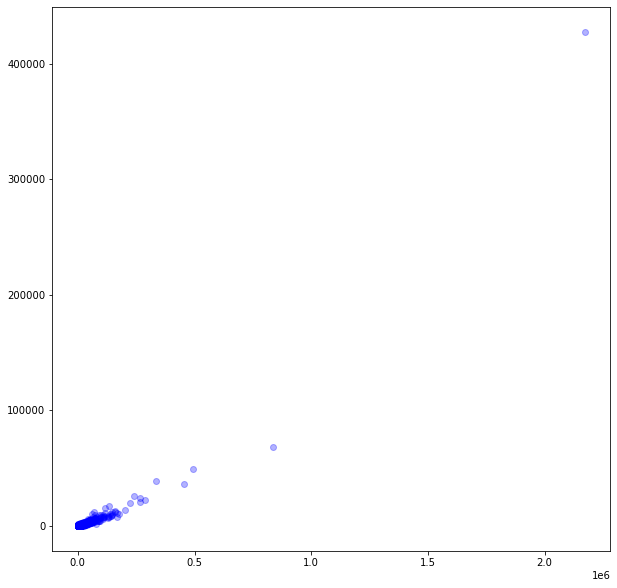

In [149]:
plt.figure(figsize=(10, 10))
plt.scatter(
    df['pop_total'],
    df['nb_ent'],
    color='b',
    alpha=.3
)
plt.show()

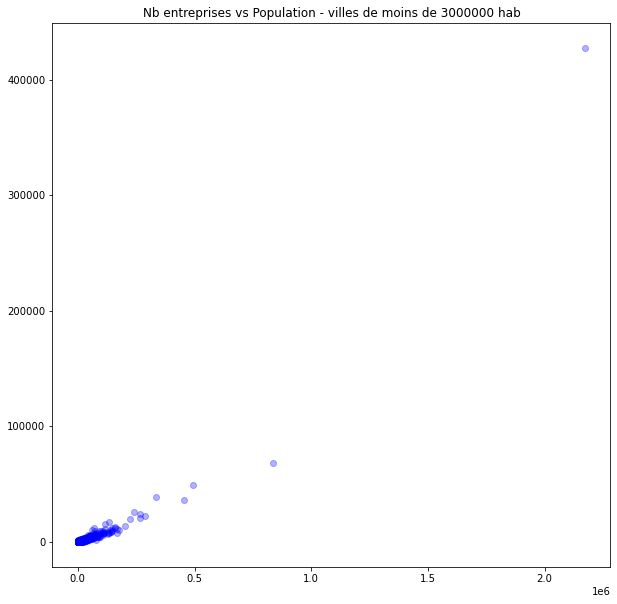

In [150]:
limite_pop = 3000000

plt.figure(figsize=(10, 10))
plt.scatter(
    df['pop_total'][df['pop_total'] < limite_pop],
    df['nb_ent'][df['pop_total'] < limite_pop],
    c='b',
    alpha=.3
)

plt.title('Nb entreprises vs Population - villes de moins de {} hab'.format(limite_pop))


plt.show()

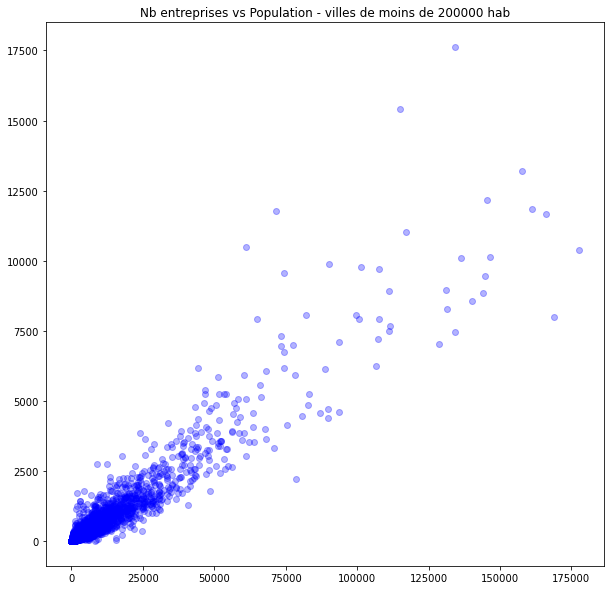

In [151]:
limite_pop = 200000

plt.figure(figsize=(10, 10))
plt.scatter(
    df['pop_total'][df['pop_total'] < limite_pop],
    df['nb_ent'][df['pop_total'] < limite_pop],
    c='b',
    alpha=.3
)

plt.title('Nb entreprises vs Population - villes de moins de {} hab'.format(limite_pop))


plt.show()

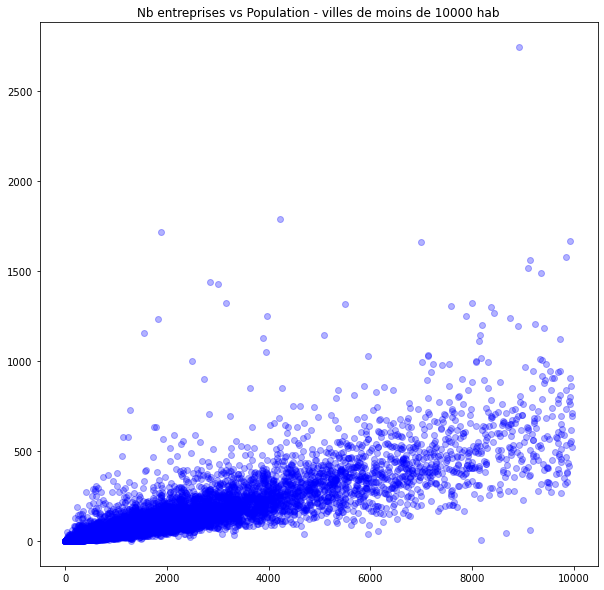

In [152]:
limite_pop = 10000

plt.figure(figsize=(10, 10))
plt.scatter(
    df['pop_total'][df['pop_total'] < limite_pop],
    df['nb_ent'][df['pop_total'] < limite_pop],
    c='b',
    alpha=.3
)

plt.title('Nb entreprises vs Population - villes de moins de {} hab'.format(limite_pop))


plt.show()

## Consommation résidentielle vs nb habitants

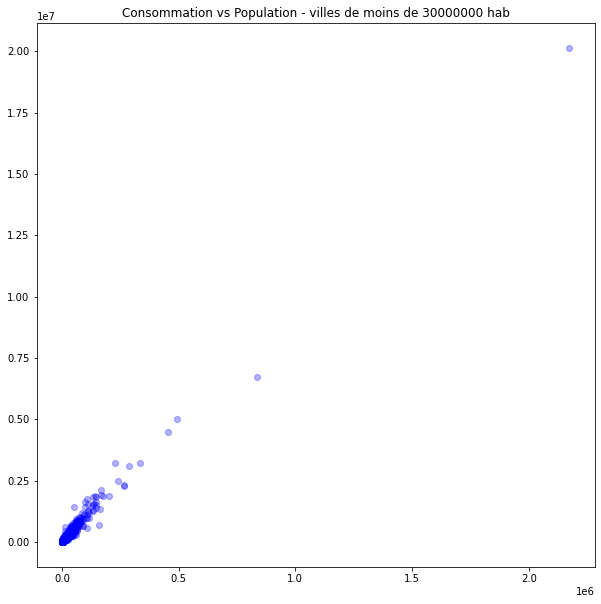

In [153]:
limite_pop = 30000000

plt.figure(figsize=(10, 10))
plt.scatter(
    df['pop_total'][df['pop_total'] < limite_pop],
    df['consommation_libelle_categorie_consommation_résidentiel'][df['pop_total'] < limite_pop],
    c='b',
    alpha=.3
)

plt.title('Consommation vs Population - villes de moins de {} hab'.format(limite_pop))


plt.show()

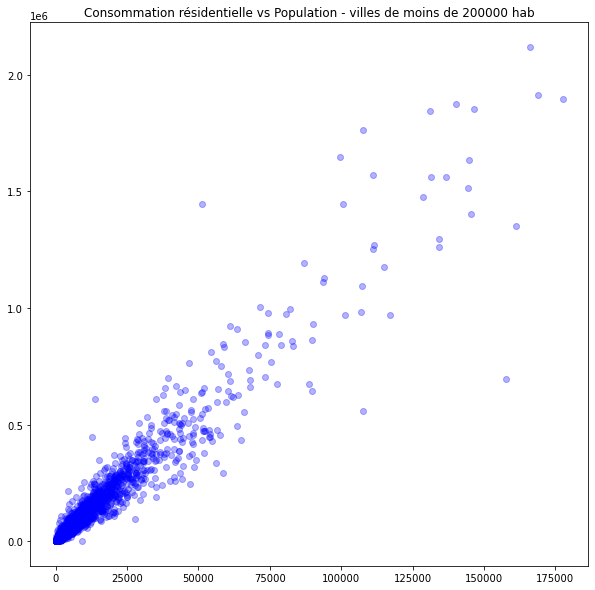

In [154]:
limite_pop = 200000

plt.figure(figsize=(10, 10))
plt.scatter(
    df['pop_total'][df['pop_total'] < limite_pop],
    df['consommation_libelle_categorie_consommation_résidentiel'][df['pop_total'] < limite_pop],
    c='b',
    alpha=.3
)

plt.title('Consommation résidentielle vs Population - villes de moins de {} hab'.format(limite_pop))


plt.show()

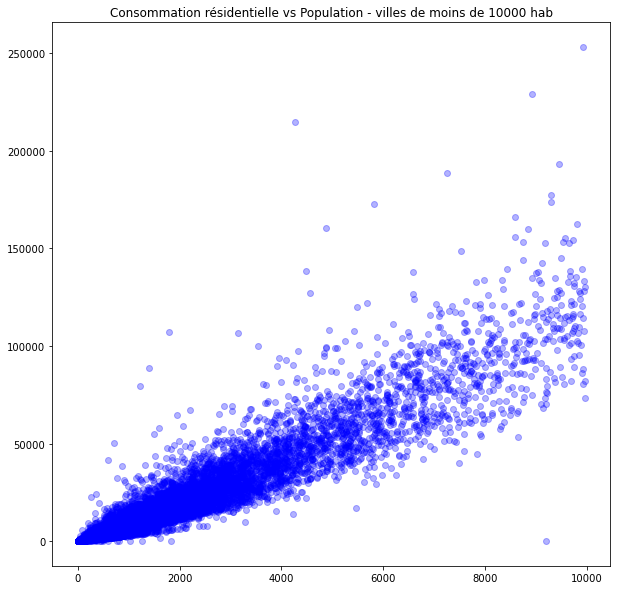

In [155]:
limite_pop = 10000

plt.figure(figsize=(10, 10))
plt.scatter(
    df['pop_total'][df['pop_total'] < limite_pop],
    df['consommation_libelle_categorie_consommation_résidentiel'][df['pop_total'] < limite_pop],
    c='b',
    alpha=.3
)

plt.title('Consommation résidentielle vs Population - villes de moins de {} hab'.format(limite_pop))


plt.show()

## Consommation entreprises vs Nb entreprises

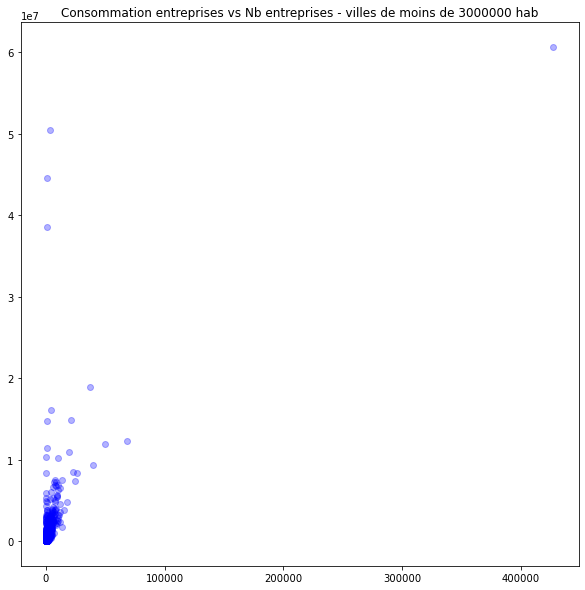

In [156]:
limite_pop = 3000000

plt.figure(figsize=(10, 10))
plt.scatter(
    df['nb_ent'][df['pop_total'] < limite_pop],
    df['consommation_libelle_categorie_consommation_entreprises'][df['pop_total'] < limite_pop],
    c='b',
    alpha=.3
)

plt.title('Consommation entreprises vs Nb entreprises - villes de moins de {} hab'.format(limite_pop))


plt.show()

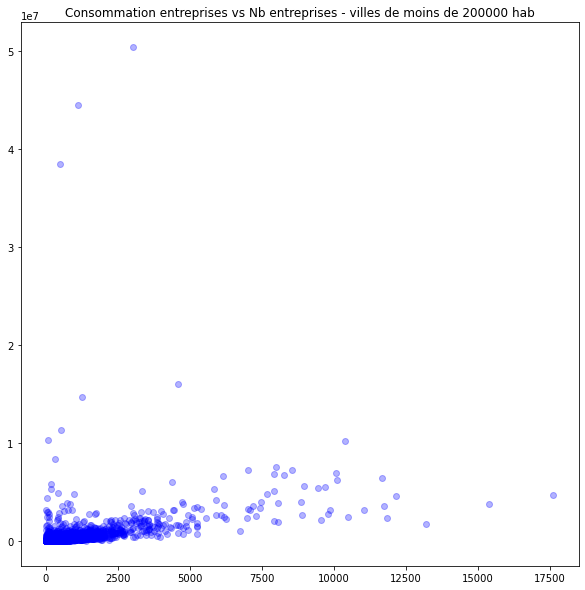

In [157]:
limite_pop = 200000

plt.figure(figsize=(10, 10))
plt.scatter(
    df['nb_ent'][df['pop_total'] < limite_pop],
    df['consommation_libelle_categorie_consommation_entreprises'][df['pop_total'] < limite_pop],
    c='b',
    alpha=.3
)

plt.title('Consommation entreprises vs Nb entreprises - villes de moins de {} hab'.format(limite_pop))


plt.show()

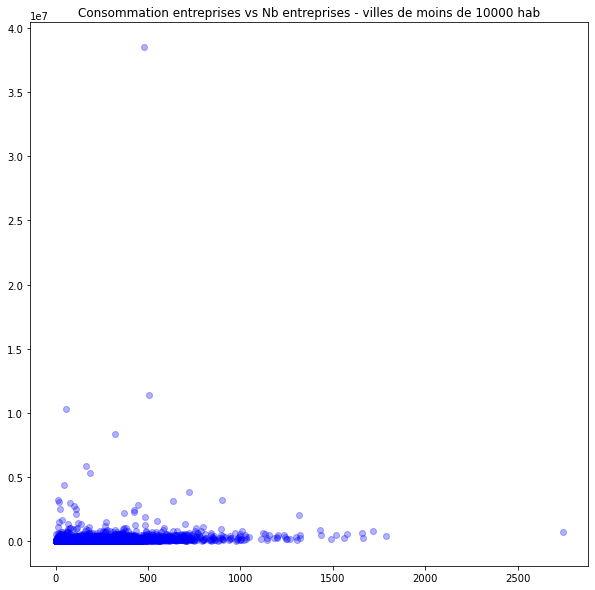

In [158]:
limite_pop = 10000

plt.figure(figsize=(10, 10))
plt.scatter(
    df['nb_ent'][df['pop_total'] < limite_pop],
    df['consommation_libelle_categorie_consommation_entreprises'][df['pop_total'] < limite_pop],
    c='b',
    alpha=.3
)

plt.title('Consommation entreprises vs Nb entreprises - villes de moins de {} hab'.format(limite_pop))


plt.show()

In [159]:
# point curieux -> correspond à Chamonix
df[df['pop_total'] < limite_pop].sort_values('nb_ent').tail()

numero_departement           nom_commune  code_region  \
26148                  73   Bourg-Saint-Maurice           82   
10945                  33              Arcachon           72   
26282                  73  Saint-Bon-Tarentaise           82   
29504                  83          Saint-Tropez           93   
26394                  74   Chamonix-Mont-Blanc           82   

                       nom_region  codgeo   latitude  longitude  \
26148                 Rhône-Alpes   73054  45.616667   6.766667   
10945                   Aquitaine   33009  44.658890  -1.163550   
26282                 Rhône-Alpes   73227  45.433333   6.633333   
29504  Provence-Alpes-Côte d'Azur   83119  43.266667   6.633333   
26394                 Rhône-Alpes   74056  45.916667   6.866667   

                   libgeo_x  nb_ent  nb_ent_0  ...  \
26148   Bourg-Saint-Maurice  1659.0    1242.0  ...   
10945              Arcachon  1665.0    1085.0  ...   
26282  Saint-Bon-Tarentaise  1718.0    1378.0  ...   
29504          Saint-Tropez  1788.0    1174.0  ...   
26394   Chamonix-Mont-Blanc  2743.0    2121.0  ...   

       consommation_libelle_grand_secteur_secteur inconnu  \
26148                                       10617.971636    
10945                                        9583.038414    
26282                                        9036.102133    
29504                                        6595.185243    
26394                                       17852.417148    

       nombre_de_points_libelle_grand_secteur_tertiaire  \
26148                                            4601.0   
10945                                            5036.0   
26282                                            6522.0   
29504                                            5471.0   
26394                                            6559.0   

       consommation_libelle_grand_secteur_tertiaire  \
26148                                 535653.520939   
10945                                 251238.502493   
26282                                 764349.324862   
29504                                 425731.509569   
26394                                 779400.206011   

       nombre_de_points_libelle_grand_secteur_résidentiel  \
26148                                           104986.0    
10945                                           232731.0    
26282                                            66630.0    
29504                                            67555.0    
26394                                           138080.0    

       consommation_libelle_grand_secteur_résidentiel  ratio_pop_ent  enfant  \
26148                                    4.018908e+05       4.220615  1848.0   
10945                                    1.337495e+06       5.962162  1046.0   
26282                                    3.374496e+05       1.100116   485.0   
29504                                    5.445792e+05       2.364094   585.0   
26394                                    1.195720e+06       3.249727  2014.0   

       jeunes_adultes adultes_actifs  retraités  
26148          1265.0         2947.0     1427.0  
10945           927.0         2648.0     5589.0  
26282           270.0          895.0      380.0  
29504           535.0         1650.0     1612.0  
26394          1305.0         4049.0     2057.0  

[5 rows x 79 columns]

In [160]:
# on retrouve aussi nos rafinneries
df[df['pop_total'] < limite_pop].sort_values('consommation_libelle_categorie_consommation_entreprises').tail()

numero_departement                nom_commune  code_region  \
17545                  54  Blénod-lès-Pont-à-Mousson           41   
27031                  76   Notre-Dame-de-Gravenchon           23   
24208                  68                Bantzenheim           42   
14631                  44        Montoir-de-Bretagne           52   
26850                  76       Gonfreville-l'Orcher           23   

             nom_region  codgeo   latitude  longitude  \
17545          Lorraine   54079  48.883333   6.050000   
27031   Haute-Normandie   76476  49.483333   0.583333   
24208            Alsace   68020  47.833333   7.500000   
14631  Pays de la Loire   44103  47.333333  -2.150000   
26850   Haute-Normandie   76305  49.500000   0.233333   

                        libgeo_x  nb_ent  nb_ent_0  ...  \
17545  Blénod-lès-Pont-à-Mousson   162.0     110.0  ...   
27031   Notre-Dame-de-Gravenchon   324.0     158.0  ...   
24208                Bantzenheim    57.0      36.0  ...   
14631        Montoir-de-Bretagne   507.0     263.0  ...   
26850       Gonfreville-l'Orcher   479.0     168.0  ...   

       consommation_libelle_grand_secteur_secteur inconnu  \
17545                                         645.026832    
27031                                        1282.012593    
24208                                         164.760297    
14631                                        2891.532076    
26850                                        7678.258148    

       nombre_de_points_libelle_grand_secteur_tertiaire  \
17545                                             454.0   
27031                                            1303.0   
24208                                             131.0   
14631                                            1228.0   
26850                                            1622.0   

       consommation_libelle_grand_secteur_tertiaire  \
17545                                  1.177247e+04   
27031                                  2.339125e+05   
24208                                  8.056105e+03   
14631                                  3.009313e+05   
26850                                  4.061441e+06   

       nombre_de_points_libelle_grand_secteur_résidentiel  \
17545                                            30690.0    
27031                                            53354.0    
24208                                             8837.0    
14631                                            45043.0    
26850                                            58400.0    

       consommation_libelle_grand_secteur_résidentiel  ratio_pop_ent  enfant  \
17545                                   293564.294707      27.333333  1091.0   
27031                                   473116.635161      29.361111  2458.0   
24208                                    99280.081968      26.982456   380.0   
14631                                   342087.959208      13.370809  1854.0   
26850                                   420267.150541      18.640919  2731.0   

       jeunes_adultes adultes_actifs  retraités  
17545           867.0         1679.0     1018.0  
27031          1565.0         3964.0     2146.0  
24208           164.0          618.0      480.0  
14631          1088.0         2796.0     1550.0  
26850          1642.0         3498.0     1826.0  

[5 rows x 79 columns]

## Cartes de consommation electrique

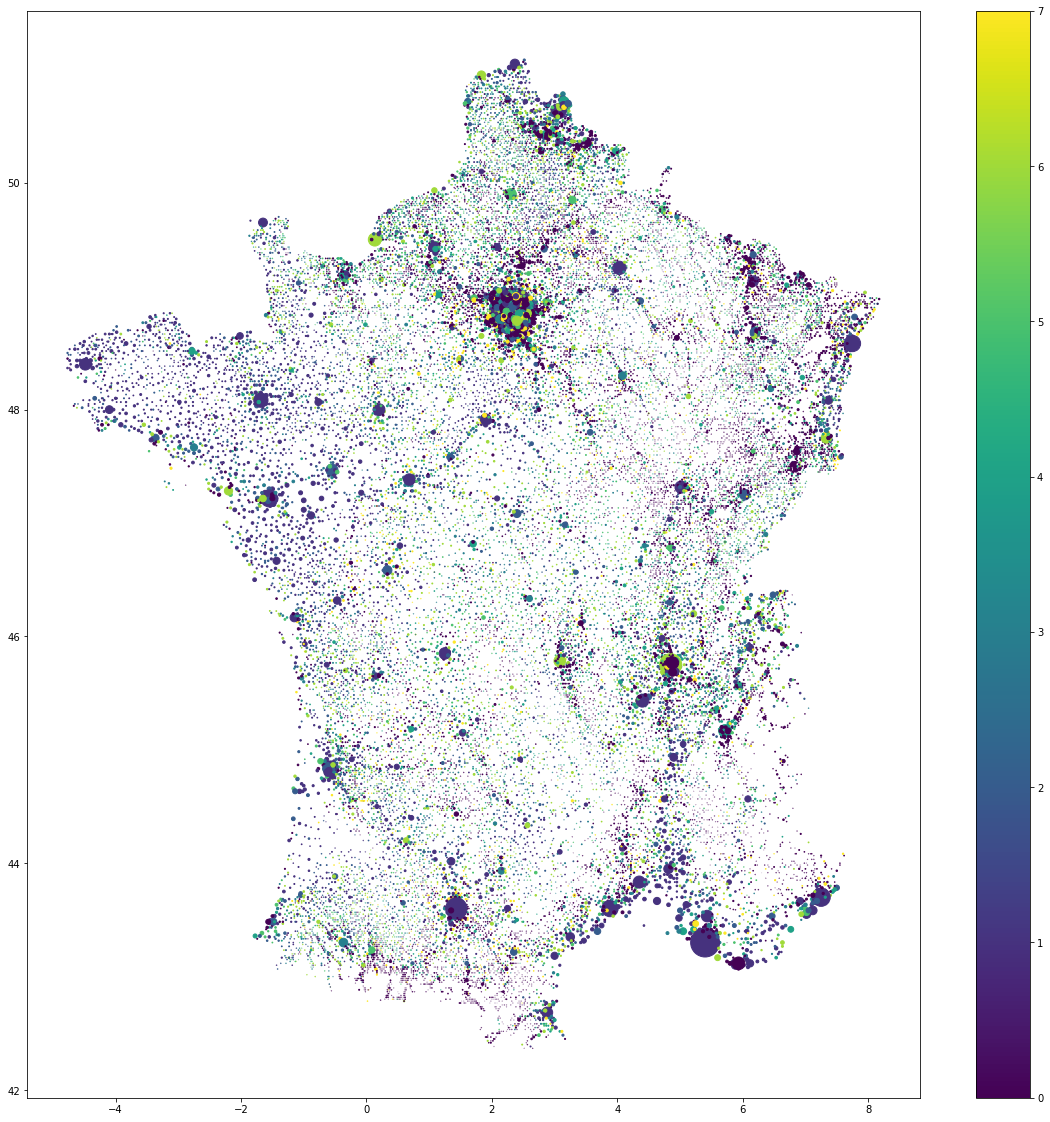

In [161]:
# Taille du point  : fonction de taille de population totale, et couloeur du point fonction de conso secteur agricole
plt.figure(figsize=(20, 20))

plt.scatter(
    df['longitude'],
    df['latitude'],
    s=df['pop_total'] * 0.001,
    c=transform_into_bins(df['consommation_libelle_grand_secteur_agriculture'])
)
# transform_into_bins est une fonction permettant de transformer x en quantiles de x 
plt.colorbar()

plt.show()

In [162]:
# point étrange -> Arles: d'apres Wikipedia forte agriculture
df.sort_values('consommation_libelle_grand_secteur_agriculture').tail()

numero_departement    nom_commune  code_region  \
25902                  72      La Flèche           52   
3957                   13  Berre-l'Etang           93   
9479                   29       Guipavas           53   
6839                   22   Ploubazlanec           53   
3949                   13          Arles           93   

                       nom_region  codgeo   latitude  longitude  \
25902            Pays de la Loire   72154  47.700000  -0.083333   
3957   Provence-Alpes-Côte d'Azur   13014  43.466667   5.183333   
9479                     Bretagne   29075  48.433333  -4.400000   
6839                     Bretagne   22210  48.800000  -3.033333   
3949   Provence-Alpes-Côte d'Azur   13004  43.666667   4.633333   

            libgeo_x  nb_ent  nb_ent_0  ...  \
25902      La Flèche   865.0     464.0  ...   
3957   Berre-l'Étang   744.0     483.0  ...   
9479        Guipavas   844.0     429.0  ...   
6839    Ploubazlanec   155.0     119.0  ...   
3949           Arles  4320.0    2942.0  ...   

       consommation_libelle_grand_secteur_secteur inconnu  \
25902                                       15671.258901    
3957                                        10996.540126    
9479                                        16065.821153    
6839                                          817.526077    
3949                                        52167.935893    

       nombre_de_points_libelle_grand_secteur_tertiaire  \
25902                                            2560.0   
3957                                             1758.0   
9479                                             1947.0   
6839                                              282.0   
3949                                             9832.0   

       consommation_libelle_grand_secteur_tertiaire  \
25902                                 309863.674951   
3957                                  113294.629165   
9479                                  661635.222127   
6839                                   20196.034044   
3949                                  896762.922606   

       nombre_de_points_libelle_grand_secteur_résidentiel  \
25902                                           111373.0    
3957                                             63545.0    
9479                                             82283.0    
6839                                             25512.0    
3949                                            366660.0    

       consommation_libelle_grand_secteur_résidentiel  ratio_pop_ent   enfant  \
25902                                    9.496935e+05      16.389595   3356.0   
3957                                     4.990979e+05      17.475806   3391.0   
9479                                     6.319632e+05      16.252370   3654.0   
6839                                     1.475580e+05      19.064516    496.0   
3949                                     2.612107e+06      11.959028  11875.0   

       jeunes_adultes adultes_actifs  retraités  
25902          2372.0         5252.0     4147.0  
3957           2532.0         5126.0     2802.0  
9479           2167.0         5615.0     3273.0  
6839            326.0          928.0     1363.0  
3949           8296.0        19712.0    14820.0  

[5 rows x 79 columns]

In [163]:
df['consommation_libelle_grand_secteur_industrie'].describe()

count    3.178000e+04
mean     2.423942e+04
std      4.677882e+05
min      0.000000e+00
25%      0.000000e+00
50%      2.879642e+01
75%      7.905287e+02
max      4.942214e+07
Name: consommation_libelle_grand_secteur_industrie, dtype: float64

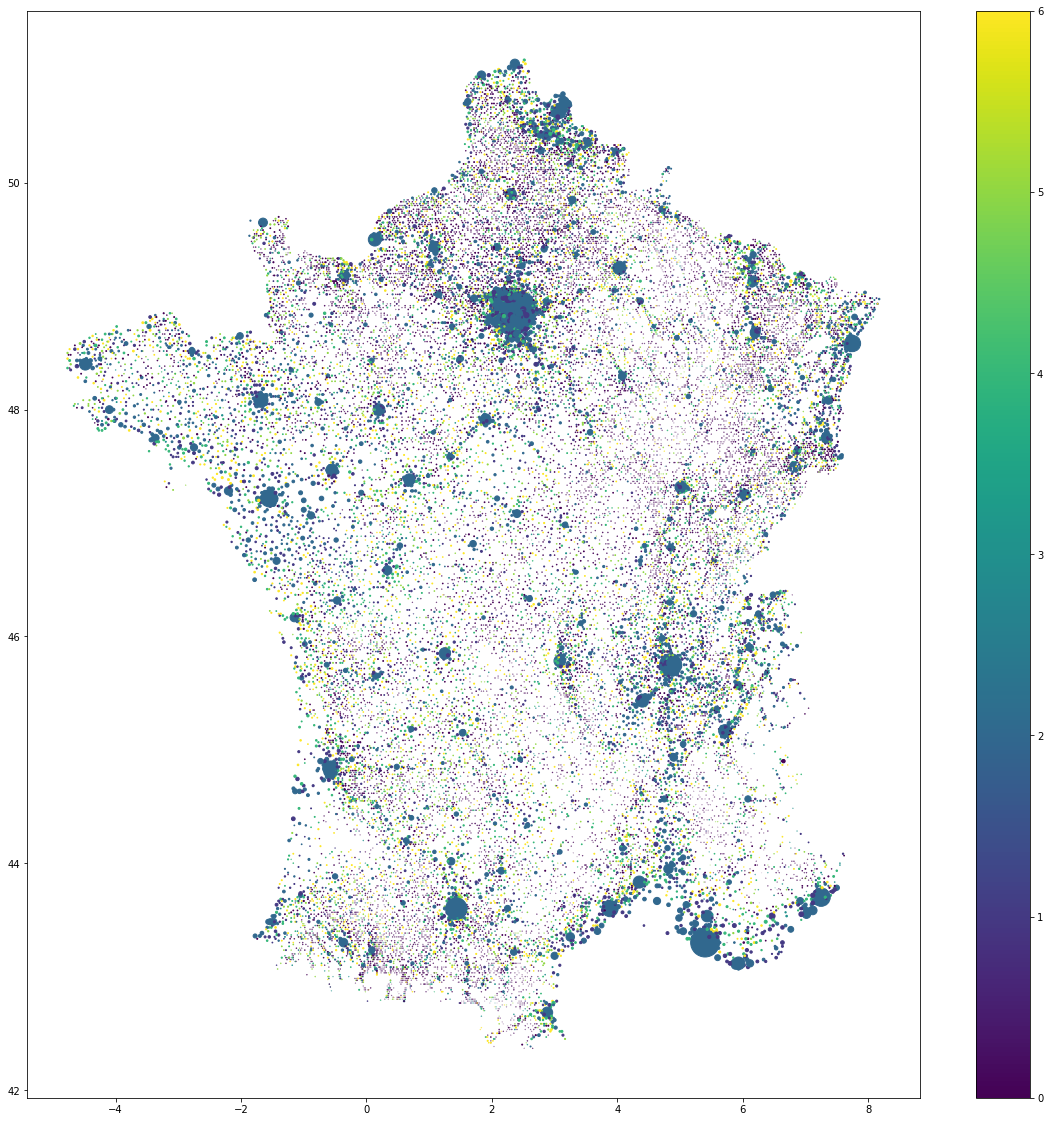

In [164]:
# Taille du point  : fonction de taille de population totale, et couleur du point fonction de conso secteur Industrie
plt.figure(figsize=(20, 20))

plt.scatter(
    df['longitude'],
    df['latitude'],
    s=df['pop_total'] * 0.001,
    c=transform_into_bins(df['consommation_libelle_grand_secteur_industrie'])
)

plt.colorbar()

plt.show()

In [165]:
df['bins_secteur_industrie'] = transform_into_bins(df['consommation_libelle_grand_secteur_industrie'])

In [166]:
df['bins_secteur_industrie'].value_counts()

0    14439
6     3178
5     3178
4     3178
2     3178
1     3178
3     1451
Name: bins_secteur_industrie, dtype: int64

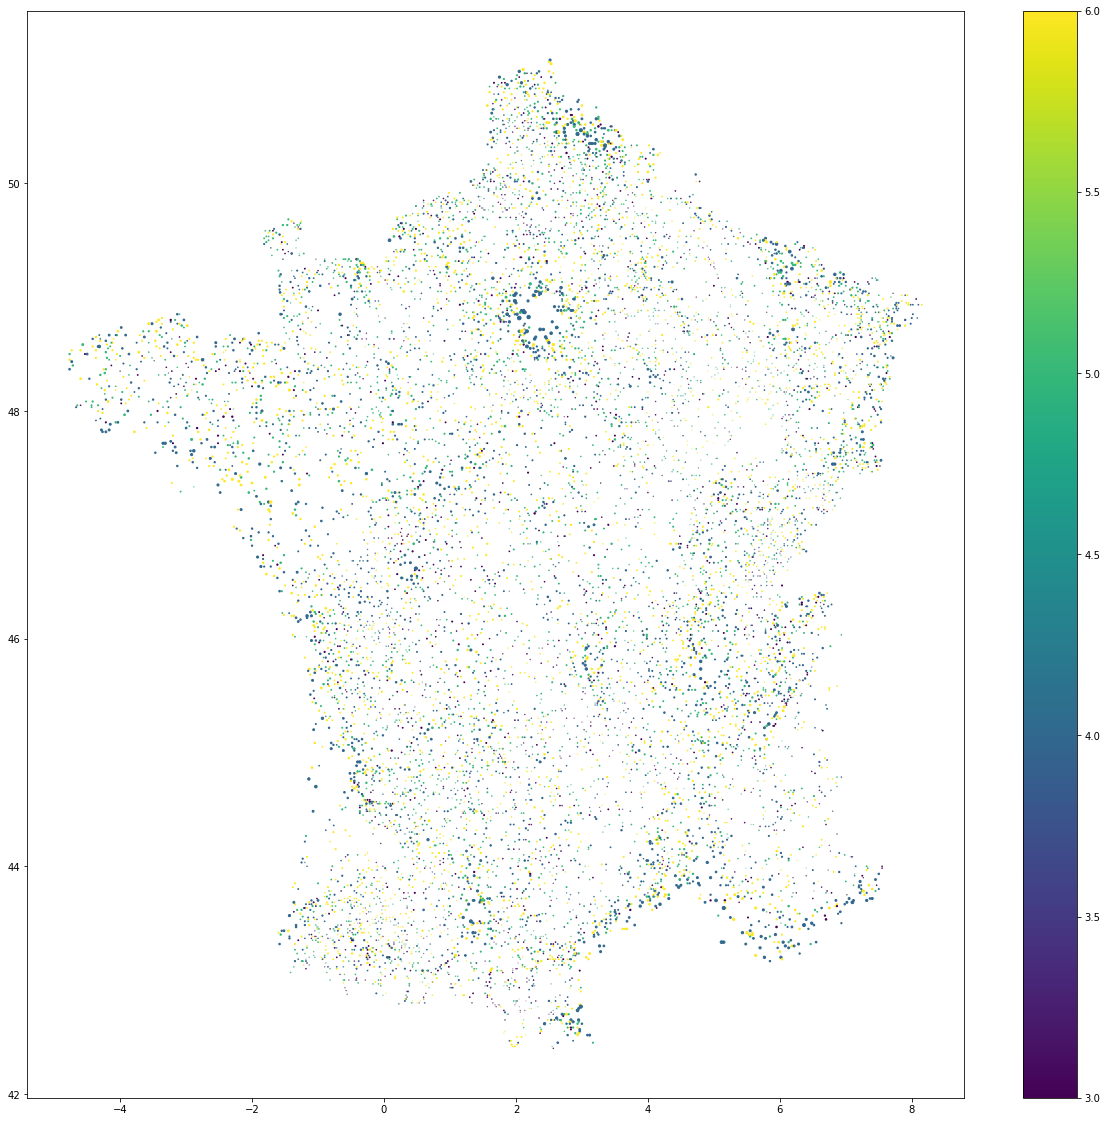

In [167]:
limit_industrie = 2

plt.figure(figsize=(21, 20))

plt.scatter(
    df['longitude'][df['bins_secteur_industrie'] > limit_industrie],
    df['latitude'][df['bins_secteur_industrie'] > limit_industrie],
    s=df['pop_total'][df['bins_secteur_industrie'] > limit_industrie] * 0.001,
    c=df['bins_secteur_industrie'][df['bins_secteur_industrie'] > limit_industrie]
)

plt.colorbar()

plt.show()

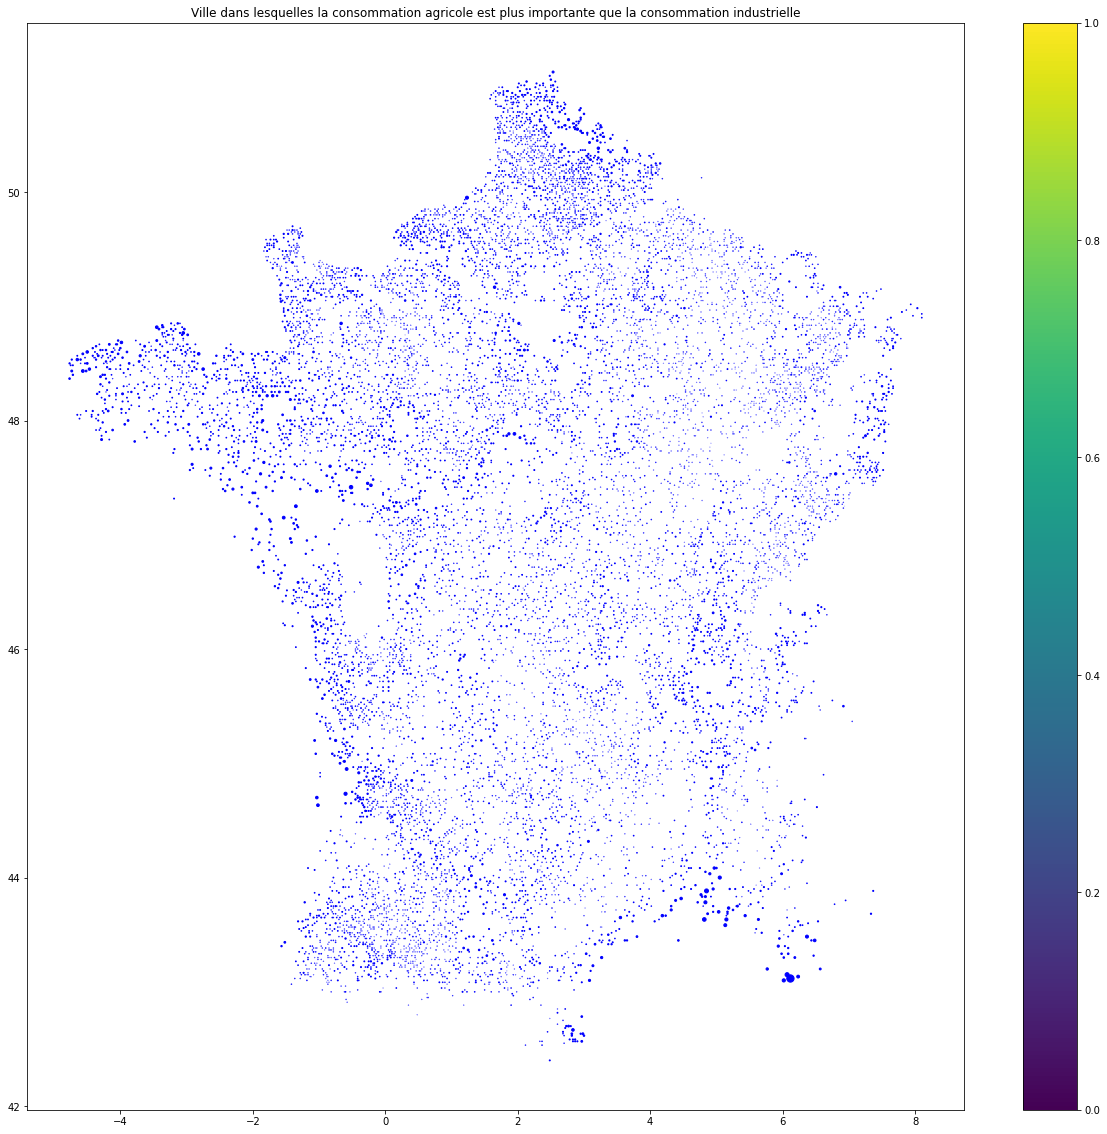

In [168]:
limit_industrie = 2

plt.figure(figsize=(21, 20))

plt.scatter(
    df['longitude'][df['consommation_libelle_grand_secteur_agriculture'] > df['consommation_libelle_grand_secteur_industrie']],
    df['latitude'][df['consommation_libelle_grand_secteur_agriculture'] > df['consommation_libelle_grand_secteur_industrie']],
    s=df['pop_total'][df['consommation_libelle_grand_secteur_agriculture'] > df['consommation_libelle_grand_secteur_industrie']] * 0.001,
    c='b'#df['bins_secteur_industrie'][df['consommation_libelle_grand_secteur_agriculture'] > df['consommation_libelle_grand_secteur_industrie']],
)

plt.colorbar()
plt.title('Ville dans lesquelles la consommation agricole est plus importante que la consommation industrielle')
plt.show()

In [169]:
df['max_conso'] = np.argmax(
    df[
        [
            'consommation_libelle_grand_secteur_agriculture',
            'consommation_libelle_grand_secteur_industrie',
            'consommation_libelle_grand_secteur_tertiaire',
#             'consommation_libelle_grand_secteur_résidentiel'
        ]
    ].values, 
    axis=1)

df['max_conso'] = df['max_conso'].replace({0: 'agriculture', 1: 'industrie', 2: 'tertiaire'})

df['max_conso'].value_counts()



tertiaire      17413
agriculture     9323
industrie       5044
Name: max_conso, dtype: int64

In [170]:
df['max_conso']

0        agriculture
1          tertiaire
2          tertiaire
3          tertiaire
4        agriculture
            ...     
31775      tertiaire
31776      tertiaire
31777      tertiaire
31778      tertiaire
31779      tertiaire
Name: max_conso, Length: 31780, dtype: object

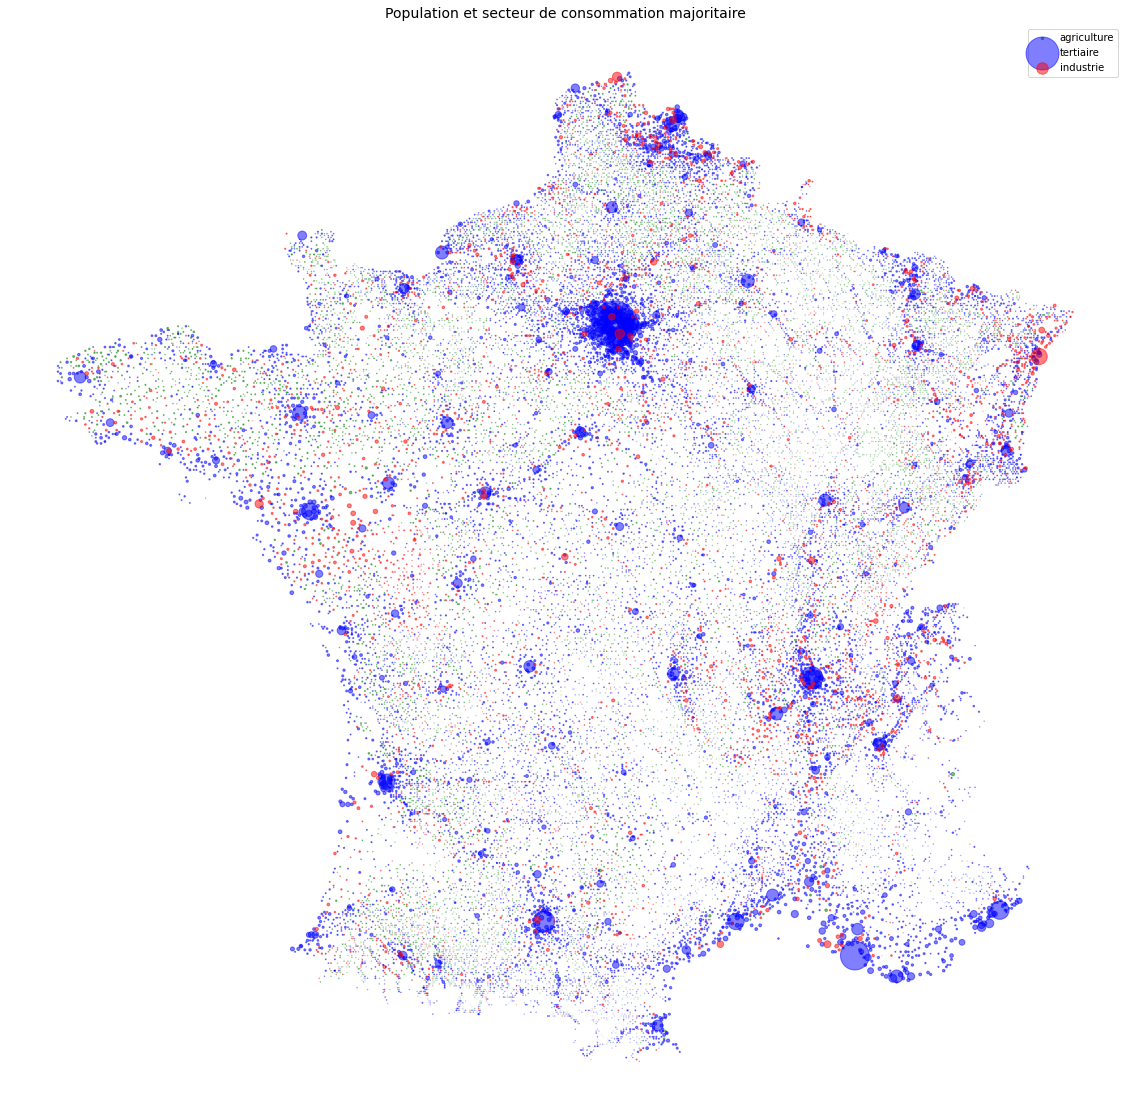

In [171]:
plt.figure(figsize=(20, 20))


colors = {
    'tertiaire': 'b',
    'industrie': 'r',
    'agriculture': 'g'
}

secteurs = df['max_conso'].unique()


for i, val in enumerate(secteurs):
    plt.scatter(
        x=df['longitude'][df['max_conso'] == val],
        y=df['latitude'][df['max_conso'] == val],
        s=df['pop_total'][df['max_conso'] == val]* 0.001,
        label=val,
        alpha=.5,
        c=colors[val]
    )
plt.title('Population et secteur de consommation majoritaire', fontsize = 14)
plt.legend()

plt.axis('off')
plt.savefig('carte_population_secteur_bg.png', facecolor='w')
plt.show()

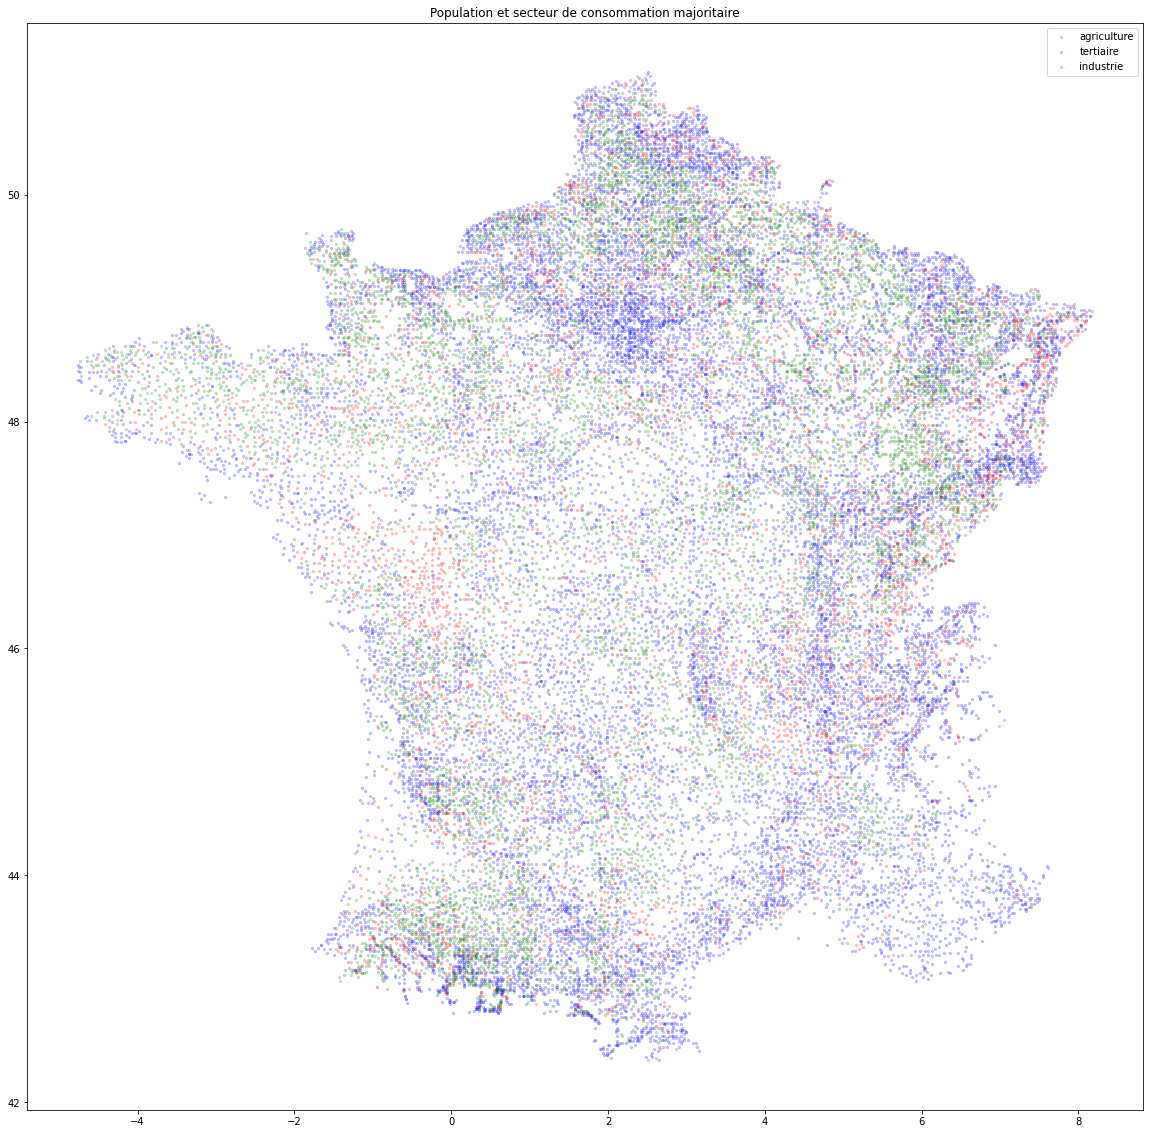

In [133]:
plt.figure(figsize=(20, 20))


colors = {
    'tertiaire': 'b',
    'industrie': 'r',
    'agriculture': 'g'
}

secteurs = df['max_conso'].unique()


for i, val in enumerate(secteurs):
    plt.scatter(
        x=df['longitude'][df['max_conso'] == val],
        y=df['latitude'][df['max_conso'] == val],
        s=5,#df['pop_total'][df['max_conso'] == val]* 0.001,
        label=val,
        alpha=.2,
        c=colors[val]
    )
plt.title('Population et secteur de consommation majoritaire')
plt.legend()

plt.show()

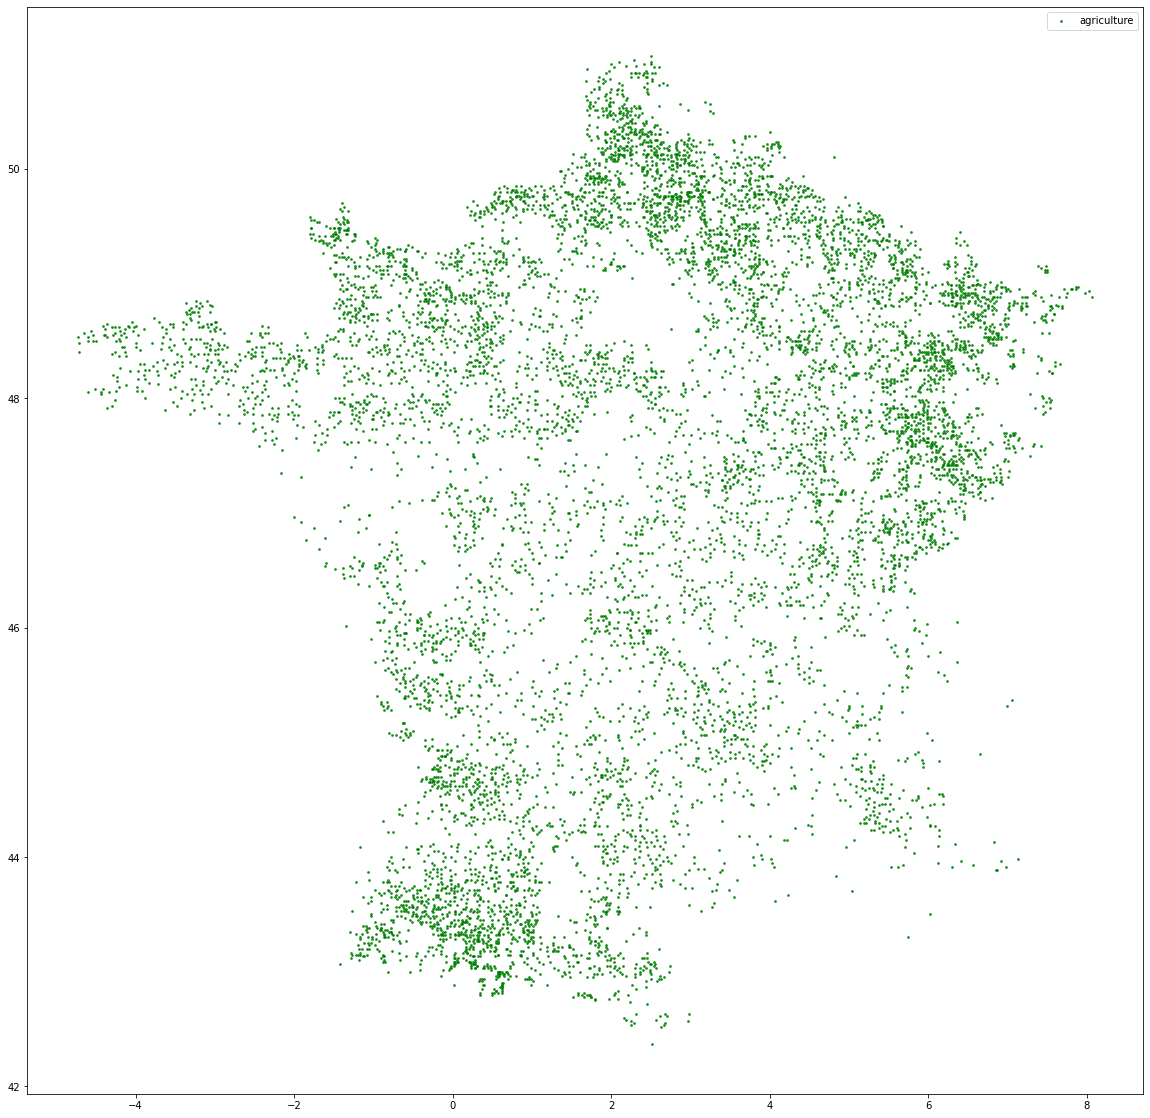

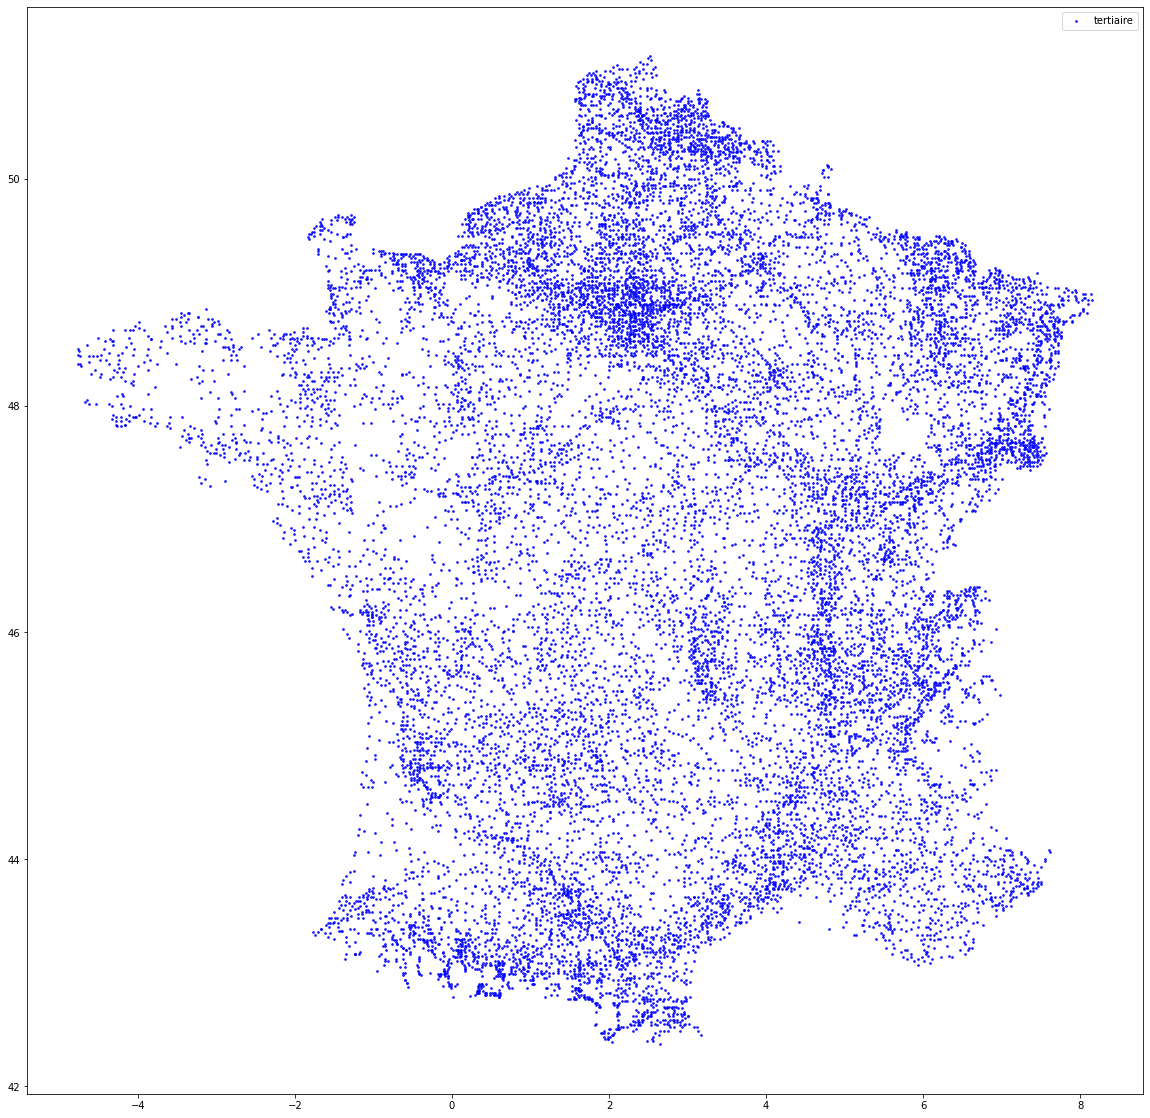

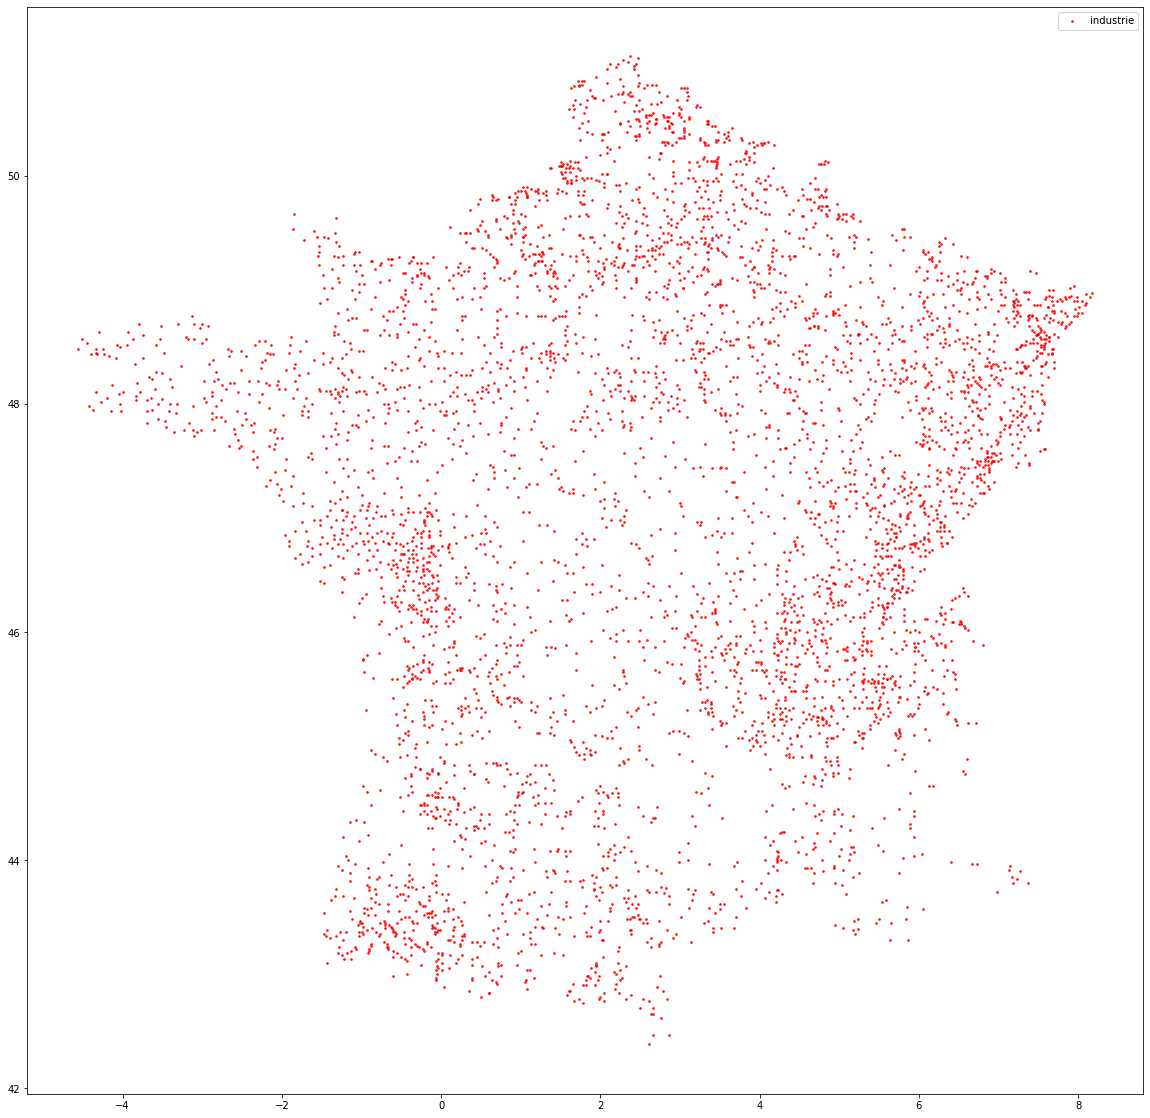

In [135]:

for i, val in enumerate(df['max_conso'].unique()):
    plt.figure(figsize=(20, 20))

    plt.scatter(
        x=df['longitude'][df['max_conso'] == val],
        y=df['latitude'][df['max_conso'] == val],
        s=3,
#         s=df['pop_total'][df['max_conso'] == val]* 0.001,
        label=val,
        alpha=.8,
        c=colors[val]
    )
    
    plt.legend()

    plt.show()

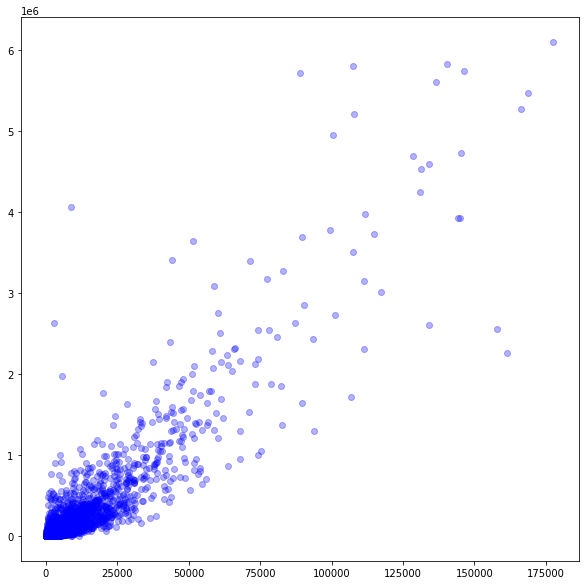

In [78]:
plt.figure(figsize=(10, 10))

population_limite = 200000



plt.scatter(
    df['pop_total'][df['pop_total'] < population_limite],
    df['consommation_libelle_grand_secteur_tertiaire'][df['pop_total'] < population_limite],
    alpha=.3,
    color=colors['tertiaire']
    
)

plt.show()

In [79]:
df[df['pop_total'] < population_limite].sort_values(['consommation_libelle_grand_secteur_résidentiel']).tail()

numero_departement               nom_commune  code_region  \
26938                  76                  Le Havre           23   
6245                   21                     Dijon           26   
14197                  42             Saint-Etienne           82   
16707                  51                     Reims           21   
23659                  66  Saint-Laurent-de-Cerdans           91   

                 nom_region  codgeo   latitude  longitude  \
26938       Haute-Normandie   76351  49.500000   0.133333   
6245              Bourgogne   21231  47.316667   5.016667   
14197           Rhône-Alpes   42218  45.433333   4.400000   
16707     Champagne-Ardenne   51454  49.250000   4.033333   
23659  Languedoc-Roussillon   66179  42.383333   2.616667   

                       libgeo_x   nb_ent  nb_ent_0  ...  \
26938                  Le Havre   7998.0    4663.0  ...   
6245                      Dijon  10130.0    6326.0  ...   
14197             Saint-Étienne  11663.0    7251.0  ...   
16707                     Reims  10388.0    6496.0  ...   
23659  Saint-Laurent-de-Cerdans     62.0      48.0  ...   

       nombre_de_points_libelle_grand_secteur_industrie  \
26938                                            1928.0   
6245                                             2422.0   
14197                                            4209.0   
16707                                            3592.0   
23659                                             909.0   

       consommation_libelle_grand_secteur_industrie  \
26938                                  2.268444e+06   
6245                                   8.509475e+05   
14197                                  1.587508e+06   
16707                                  4.466077e+06   
23659                                  5.402649e+05   

       nombre_de_points_libelle_grand_secteur_secteur inconnu  \
26938                                             7396.0        
6245                                              7884.0        
14197                                             6878.0        
16707                                             7187.0        
23659                                              168.0        

       consommation_libelle_grand_secteur_secteur inconnu  \
26938                                      102857.437221    
6245                                       208977.137710    
14197                                      303041.558068    
16707                                      123914.877491    
23659                                       89833.940000    

       nombre_de_points_libelle_grand_secteur_tertiaire  \
26938                                           28683.0   
6245                                            33163.0   
14197                                           36847.0   
16707                                           37103.0   
23659                                             103.0   

       consommation_libelle_grand_secteur_tertiaire  \
26938                                  5.467062e+06   
6245                                   5.735258e+06   
14197                                  5.267797e+06   
16707                                  6.100252e+06   
23659                                  1.145540e+03   

       nombre_de_points_libelle_grand_secteur_résidentiel  \
26938                                          1339851.0    
6245                                           1317486.0    
14197                                          1425799.0    
16707                                          1434754.0    
23659                                             6826.0    

       consommation_libelle_grand_secteur_résidentiel bins_secteur_industrie  \
26938                                    9.517044e+06                      2   
6245                                     9.820139e+06                      2   
14197                                    1.080747e+07                      2   
16707                                    1.082467e+07      

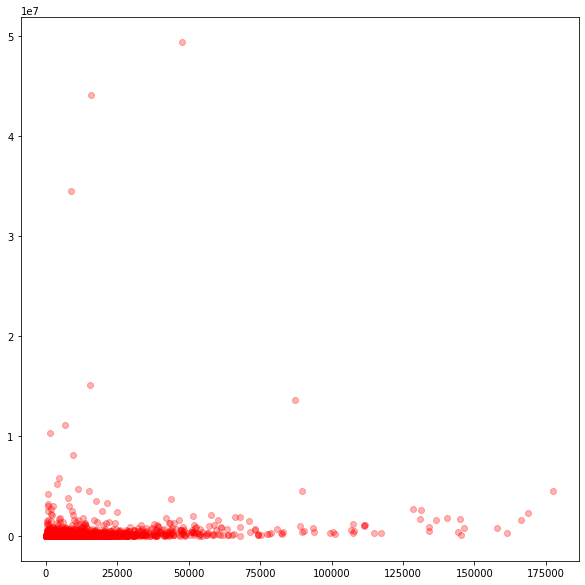

In [80]:
plt.figure(figsize=(10, 10))

population_limite = 200000



plt.scatter(
    df['pop_total'][df['pop_total'] < population_limite],
    df['consommation_libelle_grand_secteur_industrie'][df['pop_total'] < population_limite],
    alpha=.3,
    color=colors['industrie']
    
)



plt.show()

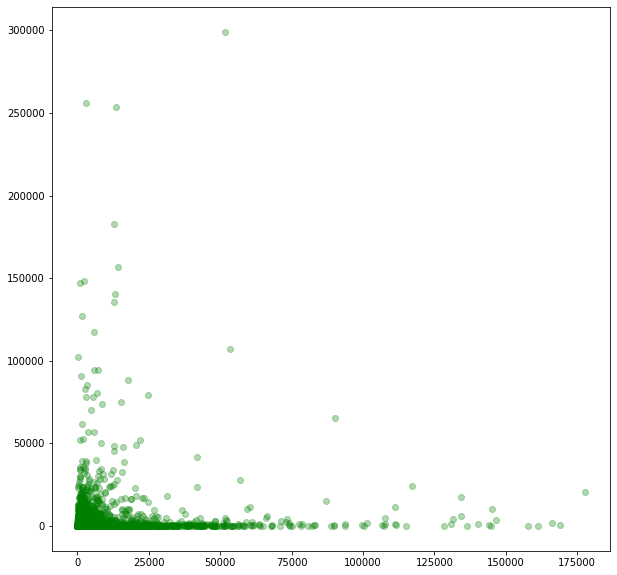

In [81]:
plt.figure(figsize=(10, 10))

population_limite = 200000



plt.scatter(
    df['pop_total'][df['pop_total'] < population_limite],
    df['consommation_libelle_grand_secteur_agriculture'][df['pop_total'] < population_limite],
    alpha=.3,
    color=colors['agriculture']
    
)



plt.show()

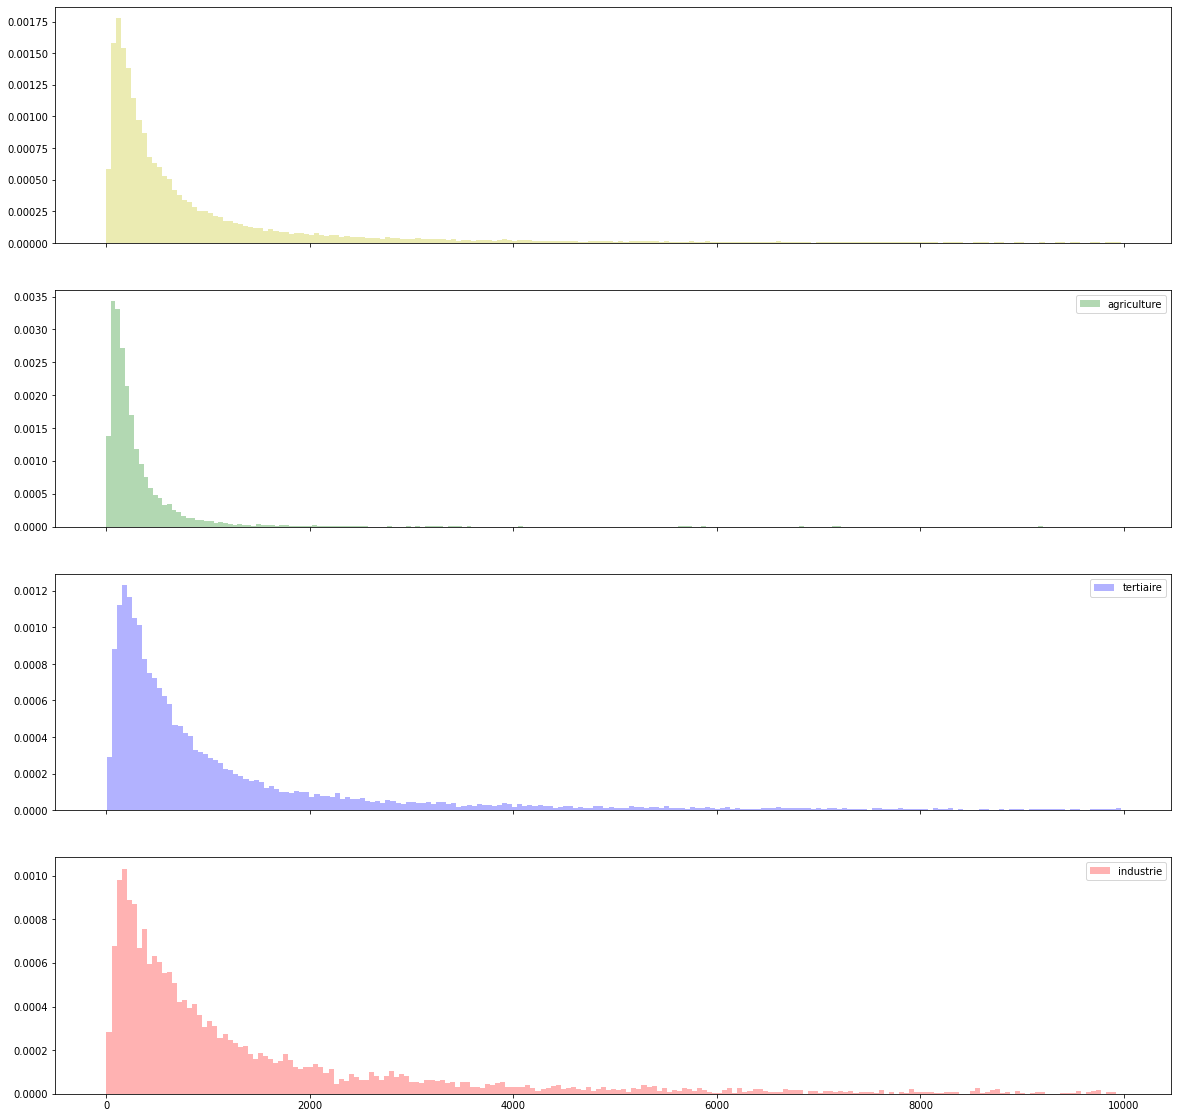

In [119]:
bins = 200
limit_population = 10000

fig, axes = plt.subplots(4, figsize=(20, 20), sharex=True)

axes[0].hist(
    df['pop_total'][df['pop_total'] < limit_population],
    bins=bins,
    label='total',
    color='y',
    alpha=.3,
    density=True
)

# axes[0].hist(
#     df['pop_total'][df['pop_total'] < limit_population],
#     bins=bins,
#     label='total' + ' cumulatif',
#     color='y',
#     density=True,
#     histtype='step',
#     cumulative=True,
# )


for i, val in enumerate(secteurs): 
    axes[i + 1].hist(
        df[df['max_conso'] == val]['pop_total'][df['pop_total'] < limit_population],
        bins=bins,
        label=val,
        color=colors[val],
        alpha=.3,
        density=True,
#         histtype='step',
#         cumulative=True
    )
    
    axes[i+1].legend()
plt.show()

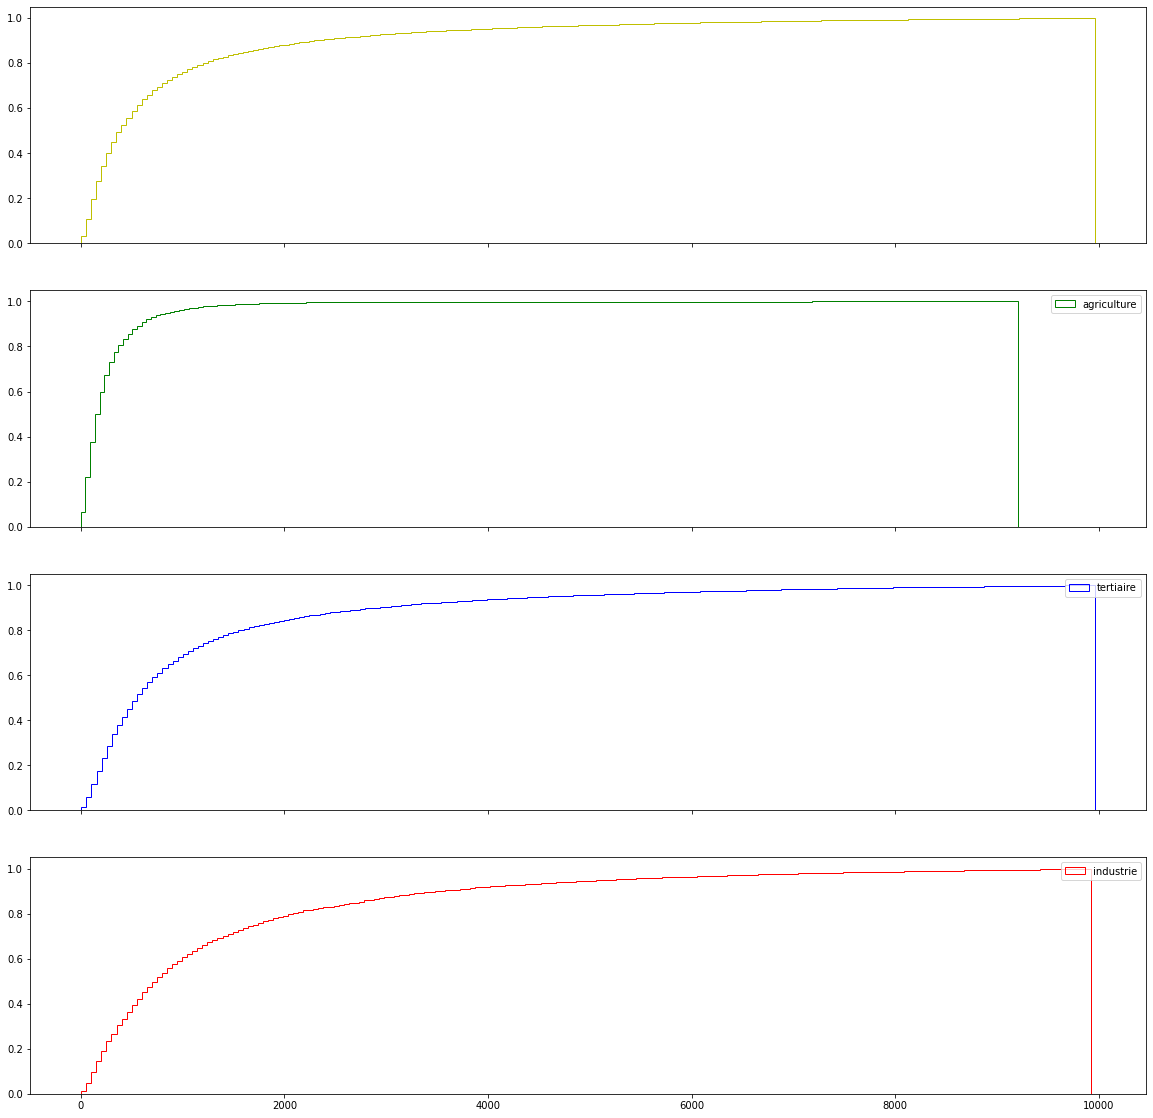

In [120]:
fig, axes = plt.subplots(4, figsize=(20, 20), sharex=True)

# axes[0].hist(
#     df['pop_total'][df['pop_total'] < limit_population],
#     bins=bins,
#     label='total',
#     color='y',
#     alpha=.3,
#     density=True
# )

axes[0].hist(
    df['pop_total'][df['pop_total'] < limit_population],
    bins=bins,
    label='total' + ' cumulatif',
    color='y',
    density=True,
    histtype='step',
    cumulative=True,
)


for i, val in enumerate(secteurs): 
    axes[i + 1].hist(
        df[df['max_conso'] == val]['pop_total'][df['pop_total'] < limit_population],
        bins=bins,
        label=val,
        color=colors[val],
#         alpha=.3,
        density=True,
        histtype='step',
        cumulative=True
    )
    
    axes[i+1].legend()
plt.show()

## Autre approche pour déterminer les villes rurales

- on calcule la consommation unitaire des entreprises dans les différents secteurs
- on détermine ensuite dans quelles villes cette consommation est dans le dernier quartile ? 

In [123]:
consommation_agricole_par_entreprises = df['consommation_libelle_grand_secteur_agriculture'] / (df['nb_ent'] + 1)

consommation_agricole_par_entreprises.describe()

count    31780.000000
mean        14.659069
std         69.092962
min          0.000000
25%          0.000000
50%          2.415994
75%         12.832371
max       7854.432997
dtype: float64

In [124]:
df[consommation_agricole_par_entreprises > 12.832371]['max_conso'].value_counts()

agriculture    5097
tertiaire      1903
industrie       945
Name: max_conso, dtype: int64

In [125]:
# pour comparaison
df['max_conso'].value_counts()

tertiaire      17413
agriculture     9323
industrie       5044
Name: max_conso, dtype: int64

In [129]:
df[df['max_conso'] == 'agriculture'].sort_values('pop_total').tail(20)

numero_departement               nom_commune  code_region  \
6839                   22              Ploubazlanec           53   
9461                   29                   Elliant           53   
29704                  85               Commequiers           52   
23619                  66           Palau-del-Vidre           91   
9429                   29               Bourg-Blanc           53   
29829                  85  Saint-André-Treize-Voies           52   
23499                  66                    Alénya           91   
9510                   29                   Landéda           53   
9543                   29                  Loperhet           53   
9558                   29                   Pleyben           53   
3977                   13                  Eyragues           93   
15891                  49              Vern-d'Anjou           52   
11891                  35                   Melesse           53   
29646                  84                  Sarrians           93   
11509                  34                    Gignac           91   
3976                   13                 Eyguières           93   
14967                  45        Saint-Denis-en-Val           24   
14717                  44                   Varades           52   
28979                  81                   Carmaux           73   
1597                    5                  Briançon           93   

                       nom_region  codgeo   latitude  longitude  \
6839                     Bretagne   22210  48.800000  -3.033333   
9461                     Bretagne   29049  48.000000  -3.883333   
29704            Pays de la Loire   85071  46.766667  -1.850000   
23619        Languedoc-Roussillon   66133  42.566667   2.966667   
9429                     Bretagne   29015  48.500000  -4.500000   
29829            Pays de la Loire   85197  46.933333  -1.416667   
23499        Languedoc-Roussillon   66002  42.633333   2.983333   
9510                     Bretagne   29101  48.583333  -4.566667   
9543                     Bretagne   29140  48.383333  -4.300000   
9558                     Bretagne   29162  48.233333  -3.966667   
3977   Provence-Alpes-Côte d'Azur   13036  43.833333   4.833333   
15891            Pays de la Loire   49367  47.600000  -0.833333   
11891                    Bretagne   35173  48.216667  -1.700000   
29646  Provence-Alpes-Côte d'Azur   84122  44.083333   4.966667   
11509        Languedoc-Roussillon   34114  43.650000   3.550000   
3976   Provence-Alpes-Côte d'Azur   13035  43.700000   5.033333   
14967                      Centre   45274  47.883333   1.950000   
14717            Pays de la Loire   44213  47.383333  -1.033333   
28979               Midi-Pyrénées   81060  44.050000   2.150000   
1597   Provence-Alpes-Côte d'Azur    5023  44.900000   6.650000   

                       libgeo_x  nb_ent  nb_ent_0  ...  \
6839               Ploubazlanec   155.0     119.0  ...   
9461                    Elliant   141.0      93.0  ...   
29704               Commequiers   147.0     104.0  ...   
23619           Palau-del-Vidre   173.0     137.0  ...   
9429                Bourg-Blanc   164.0      99.0  ...   
29829  Saint-André-Treize-Voies    36.0      29.0  ...   
23499                    Alénya   203.0     157.0  ...   
9510                    Landéda   161.0     112.0  ...   
9543                   Loperhet   164.0     116.0  ...   
9558                    Pleyben   212.0     133.0  ...   
3977                   Eyragues   338.0     238.0  ...   
15891              Vern-d'Anjou    90.0      59.0  ...   
11891                   Melesse   413.0     254.0  ...   
29646                  Sarrians   463.0     347.0  ...   
11509                    Gignac   414.0     304.0  ...   
3976                  Eyguières   438.0     317.0  ...   
14967        Saint-Denis-en-Val   325.0     229.0  ...   
14717                   Varades   225.0     138.0  ...   
28979                   Carmaux   562.0     364.0  ...   
1597      